Notebook is copyright &copy; of <a href="https://ajaytech.co"> Ajay Tech</a>. You can find an online version of the same at <a href="https://ajaytech.co/dimensionality-reduction"> Dimensionality Reduction</a> or on <a href="https://github.com/ajaytech002"> Ajay Tech's gitjhub page</a>

# Dimensionality Reduction

## Contents

- What is Dimensionality Reduction
  - Hughes Phenomenon
  - Curse of Dimensionality
  - The solution
- Principal Component Analysis - PCA
  - What is PCA
  - Basic Math
  - Mean & Variance
  - Covariance

### What is Dimensionality Reduction

When you can do with just 2 variables, do you need 4 ? What do I mean by that ? Say you are trying to do classification using the iris dataset. You already know by now that there are 4 predictors
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

To classify the target species, you can use any of the classification methods that you studied so far. What if I tell you that you can get the same level of classification accuracy in determining the target species with just 2 predictors. Let me show you with an example. 

In [69]:
# Load the dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=100)
X_train[0:4,:]

array([[5.5, 2.4, 3.7, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.8, 3. , 1.4, 0.1]])

In [72]:
from sklearn import linear_model
from scipy.special import expit

model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9666666666666667

That's an accuracy of 96% with the standard dataset using Logistic Regression. Let's test our claim ( to be able to get the same level of accuracy with just 2 variables).

In [77]:
# magic code
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(iris.data)

# Transofm the iris data to just 2 dimensions
iris_red = pca.transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(iris_red, iris.target, test_size=0.2, random_state=100)
X_train[0:4,:]

array([[-0.18962247, -0.68028676],
       [ 0.29900084, -0.34889781],
       [ 1.30079171, -0.76114964],
       [-2.78610927, -0.235112  ]])

In [78]:
# Now, let's fit the model with just these 2 variables.
model_red = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9666666666666667

voila!! That's still a 96% accuracy. How did we achieve this magic with just 2 variables ?

> The ability to reduce the number of predictors(variables) while still preserving the predictive power of the original predictors is called Dimensionality Reduction

The question that comes up next is, why reduce dimensions ? In the case of the iris dataset, there are just 4 dimensions. So, there is not much of an obvious advantage. But imagine hundreds or thousands of dimentions - and it's not an unrealistic problem either. 
- Simple 100 x 100 pixel images are actually a dataset with 10000 dimensions. 

In cases like these, it makes sense to reduce the number of dimensions. 

#### Hughes Phenomenon

In the late 70's, G. Hughes observed a strange phonomenon while observing large datasets. It is best summarized by the picture below.

<img src="./pics/hughes-phenomenon.png"/>

Intuitively, it would be easy to understand that the more inputs (features) you provide the model, the more the predictive power of the model. However, after a certain point the accuracy of the prediction drops off. This is the essence of _Hughes Phenomonon_. It is based on the fact that measuring data (features or variables) typically has some level of error to it. When you compound this error over a large number of variables, the error explodes so much that the accuracy is affected. }

#### Curse of Dimensionality

Also, in terms of the data required for accurate prediction, more dimensions mean more data. The phrase "Curse of Dimensionality" means

> As the number of dimensions(or features) grow, the amount of data we need to generalize accurately grows exponentially.

The reason for this *curse* is becauase as the number of dimensions increase, the sparsity of the data increases. You can see this in the picture below that contrasts the data sparsity of 1-d vs 2-d. 

<img src="./pics/data-sparsity.png"/>

> More features doesn't necessarily mean better accuracy.

#### The Solution

The solution to this problem is **Dimensionality Reduction**. However, this is not the same as _feature selection_. Look at ths picture below -

<img src="./pics/dimensionality-reduction-is-not-feature-selection.png"/>

As you can see, the reduced dimensions are not the same as the original dimensions. 

There are many ways in which _dimensionality reduction_ can be done. Here are some of the ways

- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- Random Projection
- Feature Agglomeration etc

Scikit learn supports some of the methods. However, the actual technique is not all that important - as long as you understand why it is used and apply it when required. In this section, we will try to understand just one of the ways in which dimensionality reduction can be done - **PCA**.

### Principal Component Analysis

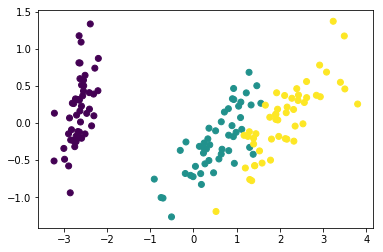

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(iris_red[:,0],iris_red[:,1],c = iris.target)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [29]:
X.shape

(400, 2)

In [30]:
y.shape

(400,)

In [33]:
reds = y == 0
blues = y == 1

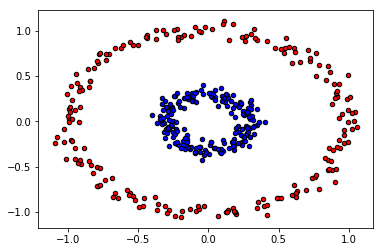

In [35]:
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')

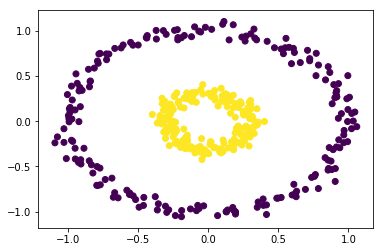

In [36]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [37]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
new_data = pca.transform(X)

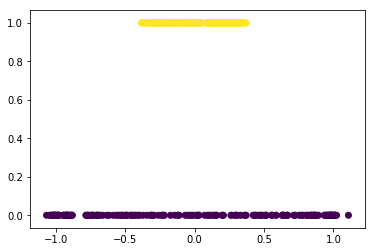

In [41]:
plt.scatter(new_data,y,c=y)

In [42]:
pca = KernelPCA(n_components = 1)
pca.fit(X)

new_data_kernel = pca.transform(X)

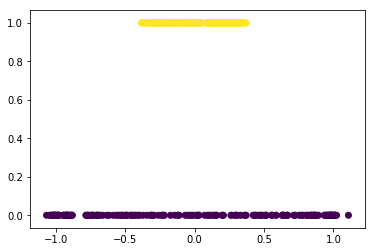

In [43]:
plt.scatter(new_data_kernel,y,c=y)